<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [5]:
#Carga desde un archivo .xlsx sin indice
Barcelona= pd.read_csv("Barcelona(Cataluña).csv", encoding="latin1")

In [6]:
#Verificamos información del DataFrame
Barcelona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18927 entries, 0 to 18926
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  18927 non-null  object 
 1   source                                        18927 non-null  object 
 2   name                                          18927 non-null  object 
 3   description                                   18189 non-null  object 
 4   neighborhood_overview                         9154 non-null   object 
 5   host_id                                       18927 non-null  int64  
 6   host_name                                     18924 non-null  object 
 7   host_since                                    18924 non-null  object 
 8   host_location                                 14551 non-null  object 
 9   host_about                                    12152 non-null 

**Determinación de Clases para datos agrupados**


In [7]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [8]:
#Corroboramos valores nulos
valores_nulos=Barcelona.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       738
neighborhood_overview                            9773
host_id                                             0
host_name                                           3
host_since                                          3
host_location                                    4376
host_about                                       6775
host_response_time                               2890
host_response_rate                               2890
host_acceptance_rate                             2744
host_is_superhost                                 567
host_neighbourhood                               9776
host_listings_count                                 3
host_total_listings_count                           3
host_verifications                                  3
host_has_profile_pic        

In [9]:
#Calculamos el numero total de la población "n"
Barcelona['host_total_listings_count']. info()
n=18927

<class 'pandas.core.series.Series'>
RangeIndex: 18927 entries, 0 to 18926
Series name: host_total_listings_count
Non-Null Count  Dtype  
--------------  -----  
18924 non-null  float64
dtypes: float64(1)
memory usage: 148.0 KB


In [10]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Barcelona['host_total_listings_count'].max()
Min=Barcelona['host_total_listings_count'].min()
Limites= [Min, Max]
Limites

[1.0, 2696.0]

In [11]:
#Calculamos el rango R
R=Max-Min
R

2695.0

In [12]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(26401)
ni

15.679779651994684

In [13]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

171.87741536005316

**Creación de Categorias a partir de clases**

In [14]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(.99, 2696.1, 16)
intervalos

array([9.900000e-01, 1.806640e+02, 3.603380e+02, 5.400120e+02,
       7.196860e+02, 8.993600e+02, 1.079034e+03, 1.258708e+03,
       1.438382e+03, 1.618056e+03, 1.797730e+03, 1.977404e+03,
       2.157078e+03, 2.336752e+03, 2.516426e+03, 2.696100e+03])

In [15]:
#Creamos las categorías 
categorias= ["Categoría1 (9.9-1.8 host_total_listings_count)", "Categoría2 (1.9-3.6 host_total_listings_count)","Categoría3 (3.7-5.4 host_total_listings_count)", "Categoría4 (5.5-7.1 host_total_listings_count)",
             "Categoría5 (7.2-8.9 host_total_listings_count)", "Categoría6 (9-1 host_total_listings_count)","Categoría7 (1.1-1.2 host_total_listings_count)", "Categoría8 (1.3-1.4 host_total_listings_count)", "Categoría9 (1.5-1.6 host_total_listings_count)", "Categoría10 (1.7-1.8 host_total_listings_count)","Categoría11 (1.9-2 host_total_listings_count)", "Categoría12 (2.1-2.3 host_total_listings_count)",
             "Categoría13 (2.4-2.5 host_total_listings_count)", "Categoría14 (2.6-2.7 host_total_listings_count)","Categoría15 (2.7-2.8 host_total_listings_count)"
             ]

In [16]:
#Finalmente creamos las categorías en la columna numérica
Barcelona['host_total_listings_count']=pd.cut(x= Barcelona['host_total_listings_count'], bins=intervalos, labels= categorias)
Barcelona['host_total_listings_count']

0         Categoría1 (9.9-1.8 host_total_listings_count)
1         Categoría1 (9.9-1.8 host_total_listings_count)
2         Categoría1 (9.9-1.8 host_total_listings_count)
3         Categoría1 (9.9-1.8 host_total_listings_count)
4         Categoría4 (5.5-7.1 host_total_listings_count)
5         Categoría1 (9.9-1.8 host_total_listings_count)
6         Categoría1 (9.9-1.8 host_total_listings_count)
7         Categoría1 (9.9-1.8 host_total_listings_count)
8         Categoría1 (9.9-1.8 host_total_listings_count)
9         Categoría1 (9.9-1.8 host_total_listings_count)
10        Categoría1 (9.9-1.8 host_total_listings_count)
11        Categoría1 (9.9-1.8 host_total_listings_count)
12        Categoría1 (9.9-1.8 host_total_listings_count)
13        Categoría1 (9.9-1.8 host_total_listings_count)
14        Categoría1 (9.9-1.8 host_total_listings_count)
15        Categoría1 (9.9-1.8 host_total_listings_count)
16        Categoría4 (5.5-7.1 host_total_listings_count)
17        Categoría1 (9.9-1.8 h

In [17]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Barcelona['host_total_listings_count'].value_counts().reset_index()
Tabla_freq

host_total_listings_count  count
0    Categoría1 (9.9-1.8 host_total_listings_count)  15908
1    Categoría2 (1.9-3.6 host_total_listings_count)   1318
2    Categoría4 (5.5-7.1 host_total_listings_count)    973
3        Categoría6 (9-1 host_total_listings_count)    542
4    Categoría3 (3.7-5.4 host_total_listings_count)    174
5   Categoría15 (2.7-2.8 host_total_listings_count)      6
6    Categoría5 (7.2-8.9 host_total_listings_count)      1
7    Categoría7 (1.1-1.2 host_total_listings_count)      1
8   Categoría14 (2.6-2.7 host_total_listings_count)      1
9    Categoría8 (1.3-1.4 host_total_listings_count)      0
10   Categoría9 (1.5-1.6 host_total_listings_count)      0
11  Categoría10 (1.7-1.8 host_total_listings_count)      0
12    Categoría11 (1.9-2 host_total_listings_count)      0
13  Categoría12 (2.1-2.3 host_total_listings_count)      0
14  Categoría13 (2.4-2.5 host_total_listings_count)      0

In [18]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

host_total_listings_count  count
0   Categoría1 (9.9-1.8 host_total_listings_count)  15908
1   Categoría2 (1.9-3.6 host_total_listings_count)   1318
2   Categoría4 (5.5-7.1 host_total_listings_count)    973
3       Categoría6 (9-1 host_total_listings_count)    542
4   Categoría3 (3.7-5.4 host_total_listings_count)    174
5  Categoría15 (2.7-2.8 host_total_listings_count)      6
6   Categoría5 (7.2-8.9 host_total_listings_count)      1
7   Categoría7 (1.1-1.2 host_total_listings_count)      1
8  Categoría14 (2.6-2.7 host_total_listings_count)      1

In [19]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('host_total_listings_count')
Filtro_index

count
host_total_listings_count                             
Categoría1 (9.9-1.8 host_total_listings_count)   15908
Categoría2 (1.9-3.6 host_total_listings_count)    1318
Categoría4 (5.5-7.1 host_total_listings_count)     973
Categoría6 (9-1 host_total_listings_count)         542
Categoría3 (3.7-5.4 host_total_listings_count)     174
Categoría15 (2.7-2.8 host_total_listings_count)      6
Categoría5 (7.2-8.9 host_total_listings_count)       1
Categoría7 (1.1-1.2 host_total_listings_count)       1
Categoría14 (2.6-2.7 host_total_listings_count)      1

Text(0, 0.5, 'Frecuencia')

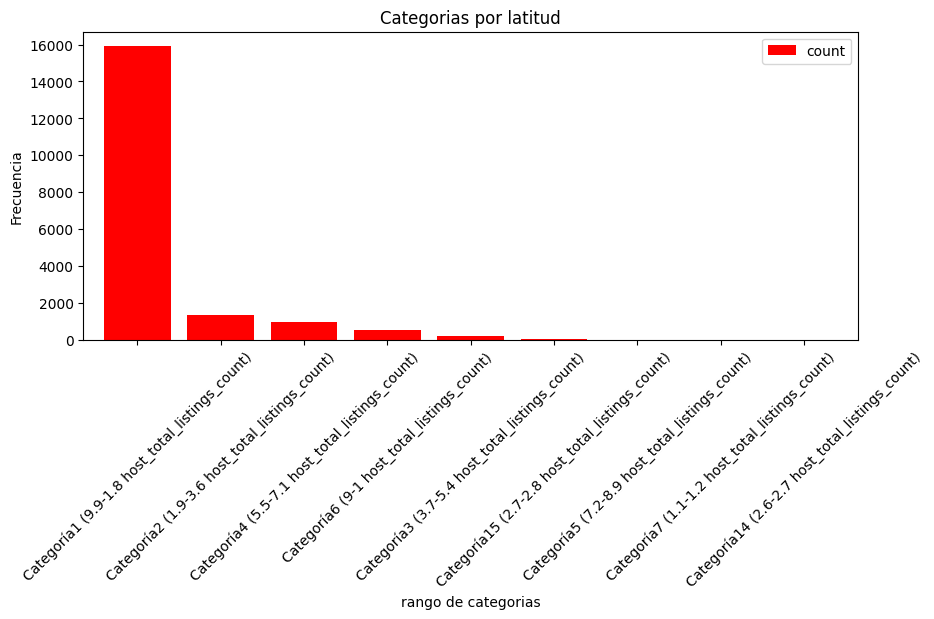

In [20]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')